In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from IPython.display import clear_output

In [196]:
# Preproceso de datos

data = pd.read_csv('mnist_train_small.csv', header=None);

# headers son "pixeles" en escala de blanco y negro
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
data_np = data.to_numpy()

X = data_np[:, 1:]
y = data_np[:, 0]

In [198]:
# valores a predecir y cuántos X tiene asociado
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1962, 2243, 1989, 2021, 1924, 1761, 2039, 2126, 1912, 2023]))

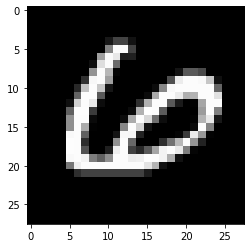

In [199]:
ind_aux = 0
# Cada número es de 28x28 pixeles en escala de grises. 0 es para blanco y 254 para negro(?)
plt.imshow(X[ind_aux].reshape(28, 28), cmap='gray')

### (a) Realizar una reducción dimensional a dos componentes principales de todo el conjunto de datos.

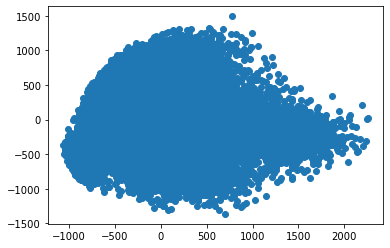

In [200]:
# Reducimos la dimensión de los datos de entrada a dos componentes principales

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

# Tener en cuenta que en la literatura se debe empezar a "contar" desde 1 y no cero.

# Los datos reducidos a dos componentes son:
plt.scatter(X_pca[:, 0], X_pca[:, 1])


### (b) Separar los datos a cuyas etiquetas corresponan el 0 y 1 de tal forma que a cada etiqueta correspondan 50 muestras para crear un conjunto de entrenamiento

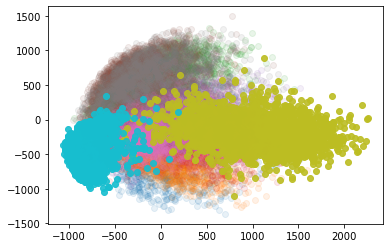

In [201]:
select = [0, 1]

for num in set([i for i in range(10)]) - set(select):
    plt.scatter(X_pca[y==num, 0], X_pca[y==num, 1], label=f'Clase: {num}', alpha=0.1)

for num in select:
    plt.scatter(X_pca[y==num, 0], X_pca[y==num, 1], label=f'Clase: {num}', alpha=0.9)


In [202]:
# Entradas cuya etiqueta corresponde a y = 0
X_0 = X_pca[y == 0]
# Entradas cuya etiqueta corresponde a y = 1
X_1 = X_pca[y == 1]

# Tomamos una muestra de 50 elementos de cada vector
sample_size = 50

# Generamos 50 indices correspondientes a 50 puntos
random_idx = np.random.randint(min(X_1.shape[0], X_0.shape[0]), size=sample_size)
random_idx

array([1099, 1598,  481, 1347,   63, 1129,  677, 1043,  801,   32, 1813,
       1871, 1944,  716,  652, 1642, 1168, 1938, 1183,  581,  338, 1719,
        434, 1079,  226,  975, 1332,  323,  580, 1228, 1952, 1103,  225,
        687, 1231,   96, 1834, 1814,  256,  134,  901, 1207,  189,  488,
       1494, 1272, 1819, 1167,  602,  384])

In [203]:
# Del conjunto de datos de entrada asociados a 0 y 1 seleccionamos aquellos índices escogidos de forma aleatoria
# para entrenamiento.

X_0_train = X_0[random_idx]
X_1_train = X_0[random_idx]

X_0_df = pd.DataFrame(X_0)
X_0_df['y'] = 0
X_1_df = pd.DataFrame(X_1)
X_1_df['y'] = 1

X_01_space = pd.concat([X_0_df, X_1_df], ignore_index=True)

print(f'Dimensión de X_0_train: {X_0_train.shape}')
print(f'Dimensión de X_1_train: {X_1_train.shape}')

Dimensión de X_0_train: (50, 2)
Dimensión de X_1_train: (50, 2)


In [204]:
# Generamos un conjunto de entrenamiento y sus etiquetas correspondientes

X_0_train_df = pd.DataFrame(X_0_train)
X_0_train_df['y'] = 0

X_1_train_df = pd.DataFrame(X_1_train)
X_1_train_df['y'] = 1

X_train_df = pd.concat([X_0_train_df, X_1_train_df], ignore_index=True)

X_train = X_train_df[[0,1]].to_numpy()
y_train = X_train_df['y'].to_numpy()

print(f'Forma de X_train: {X_train.shape}')
print(f'Forma de y_train: {y_train.shape}')

Forma de X_train: (100, 2)
Forma de y_train: (100,)


### (c) Grafica la malla de la clasificación y los puntos de los datos completos de ambas etiquetas usando K-NN

In [205]:
# Entrenamos un modelo KNN con los datos de entrenamiento previamente generados

k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

X_01 = np.concatenate((X_0, X_1), axis=0)

y_pred = knn.predict(X_01_space[[0,1]].to_numpy())
y_pred_train = knn.predict(X_train)

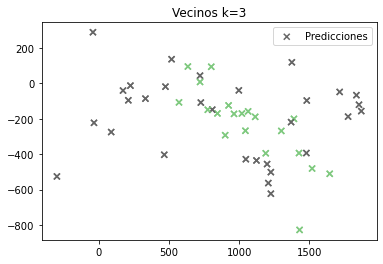

In [206]:
# Predicciones con el conjunto de prueba
plt.scatter(X_train[:, 0], X_train[:, 1],marker='x', c=y_pred_train,cmap='Accent', label='Predicciones')
plt.title(f'Vecinos k={k}')
plt.legend()
plt.show()

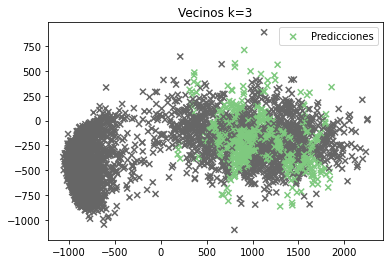

In [207]:
# Predicciones con el conjunto de datos completo para y = 0, 1

plt.scatter(X_01_space.to_numpy()[:, 0], X_01_space.to_numpy()[:, 1],marker='x', c=y_pred,cmap='Accent', label='Predicciones')
plt.title(f'Vecinos k={k}')
plt.legend()
plt.show()

### (d) Usando sklearn.metrics.classification_report() cree un informe que muestre las principales métricas de clasificación.

In [208]:
print(
    classification_report(y_true=X_01_space[['y']].to_numpy(), y_pred=y_pred, target_names=['número 0', 'número 1'])
)

              precision    recall  f1-score   support

    número 0       1.00      0.41      0.58      1962
    número 1       0.66      1.00      0.79      2243

    accuracy                           0.72      4205
   macro avg       0.83      0.70      0.69      4205
weighted avg       0.82      0.72      0.69      4205



### Discutan en equipo y den una conclusión de lo que se observa en los datos. ¿Qué puedes decir acerca de las muestras si se usaran 10 muestras por clase? ¿Son muchas o pocas?

Al variar el número de muestras se observa que a menor cantidad de muestras más errático es el modelo. En particular, al repetir el experimento para 10 muestras el reporte de clasificación de sklearn reporta que hay datos a los que no se les pudo asignar etiqueta alguna. Por lo tanto, se concluye que 10 muestras son pocas. También se encontró que a más de 100 muestras el desempeño del modelo no mejora. La hipótesis del motivo detrás de esto es que la reducción de dimensión realizada por PCA pierde información que podría hacer que KNN mejorara con una mayor cantidad de muestras en precisión y exactitud.